In [1]:
#importing necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for mathematical functions
pd.set_option('display.max_columns',None) # to display all the columns
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt
import requests

In [2]:
#reading the dataset
df = pd.read_csv('imdb.csv')
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,\N,1,0,2089,1,10,2,0,4,3,short,0,False,True,0,7,16,2092,['US'],"Documentary,Short",1,3,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",9,0,1,['silent'],0
1,Un bon bock,"(5, 6]",1892,\N,12,0,183,1,10,2,0,2,0,short,0,False,True,0,6,1,183,['FR'],"Animation,Short",0,0,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",3,0,1,['silent'],0
2,Chinese Opium Den,"(4, 5]",1894,\N,1,0,195,1,10,1,0,1,0,short,0,False,True,0,5,0,195,['US'],Short,0,1,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",4,0,1,['silent'],0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,\N,1,1,2237,1,10,3,0,4,2,short,0,False,True,0,6,20,2238,['US'],"Documentary,Short",1,6,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,\N,1,0,13115,1,10,12,0,11,16,short,0,False,True,0,21,66,13115,['FR'],"Documentary,Short",6,5,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",21,0,2,['silent'],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,\N,96,0,11,1,10,0,0,11,0,movie,0,False,True,0,1,0,11,['CO'],Documentary,0,2,7.0,"['\\N', 'CO']",1,1,1,[],0
149527,Eco,"(6, 7]",2019,\N,14,0,15,1,10,4,1,52,1,short,3,False,True,0,1,0,15,['ES'],"Drama,Short",6,3,6.4,"['\\N', 'ES']",5,1,1,[],0
149528,Women Take Center Stage,"(5, 6]",2019,\N,\N,0,12,1,10,2,3,32,0,tvEpisode,0,False,True,0,0,0,12,NaN,Reality-TV,1,0,5.6,['\\N'],0,0,0,[],0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,\N,10,0,9,1,10,1,0,15,0,tvEpisode,0,False,True,0,0,0,10,NaN,"Adventure,Animation,Comedy",7,0,7.1,['\\N'],0,3,1,[],0


In [3]:
#checking the null values and data type of each class
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149531 entries, 0 to 149530
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                149531 non-null  object 
 1   rating                       149531 non-null  object 
 2   startYear                    149531 non-null  int64  
 3   endYear                      149531 non-null  object 
 4   runtimeMinutes               149531 non-null  object 
 5   awardWins                    149531 non-null  int64  
 6   numVotes                     149531 non-null  int64  
 7   worstRating                  149531 non-null  int64  
 8   bestRating                   149531 non-null  int64  
 9   totalImages                  149531 non-null  int64  
 10  totalVideos                  149531 non-null  int64  
 11  totalCredits                 149531 non-null  int64  
 12  criticReviewsTotal           149531 non-null  int64  
 13 

In [4]:
#some statistical measure of numerical columns
df.describe()

,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,isAdult,numRegions,userReviewsTotal,ratingCount,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
count,149531.000000,149531.000000,1.495310e+05,149531.0,149531.0,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,1.495310e+05,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000
mean,1994.939852,0.308558,1.085135e+03,1.0,10.0,9.531856,0.235851,57.619009,2.191653,0.418916,0.018277,2.846554,5.572791,1.085733e+03,19.519832,5.821341,6.874827,5.177261,2.003725,0.945276,1.067772
std,24.890965,2.912763,1.999973e+04,0.0,0.0,101.653836,5.084344,154.168251,13.944788,4.384281,0.133952,5.295663,66.404683,2.000802e+04,82.618284,19.657756,1.348353,19.928593,2.467848,0.796154,7.025515
min,1878.000000,0.000000,5.000000e+00,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,0.000000,1.200000e+01,1.0,10.0,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.200000e+01,5.000000,1.000000,6.100000,0.000000,0.000000,1.000000,0.000000
50%,1999.000000,0.000000,2.800000e+01,1.0,10.0,1.000000,0.000000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e+01,12.000000,2.000000,7.100000,1.000000,1.000000,1.000000,0.000000
75%,2015.000000,0.000000,1.070000e+02,1.0,10.0,4.000000,0.000000,64.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.070000e+02,21.000000,5.000000,7.800000,3.000000,3.000000,1.000000,0.000000
max,2024.000000,446.000000,2.947931e+06,1.0,10.0,20586.000000,1063.000000,25218.000000,628.000000,650.000000,1.000000,100.000000,11289.000000,2.948790e+06,10649.000000,597.000000,10.000000,744.000000,51.000000,58.000000,1084.000000


In [18]:
#seeing the number of unique values in each feature
print('The number of unique values in: \n')
for i in df.columns:
    print(i+':',len(df[i].unique()))

The number of unique values in: 

originalTitle: 133101
rating: 10
startYear: 137
endYear: 79
runtimeMinutes: 377
awardWins: 86
numVotes: 6155
worstRating: 1
bestRating: 1
totalImages: 609
totalVideos: 93
totalCredits: 1066
criticReviewsTotal: 312
titleType: 10
awardNominationsExcludeWins: 114
canHaveEpisodes: 2
isRatable: 1
isAdult: 2
numRegions: 71
userReviewsTotal: 633
ratingCount: 6179
countryOfOrigin: 2662
genres: 1419
castNumber: 677
companiesNumber: 208
averageRating: 91
regions: 26136
externalLinks: 374
writerCredits: 40
directorsCredits: 27
soundMixes: 305
quotesTotal: 137


In [4]:
#dropping the features which has only 1 value
df.drop(columns = ['worstRating', 'bestRating','isRatable'],inplace = True)

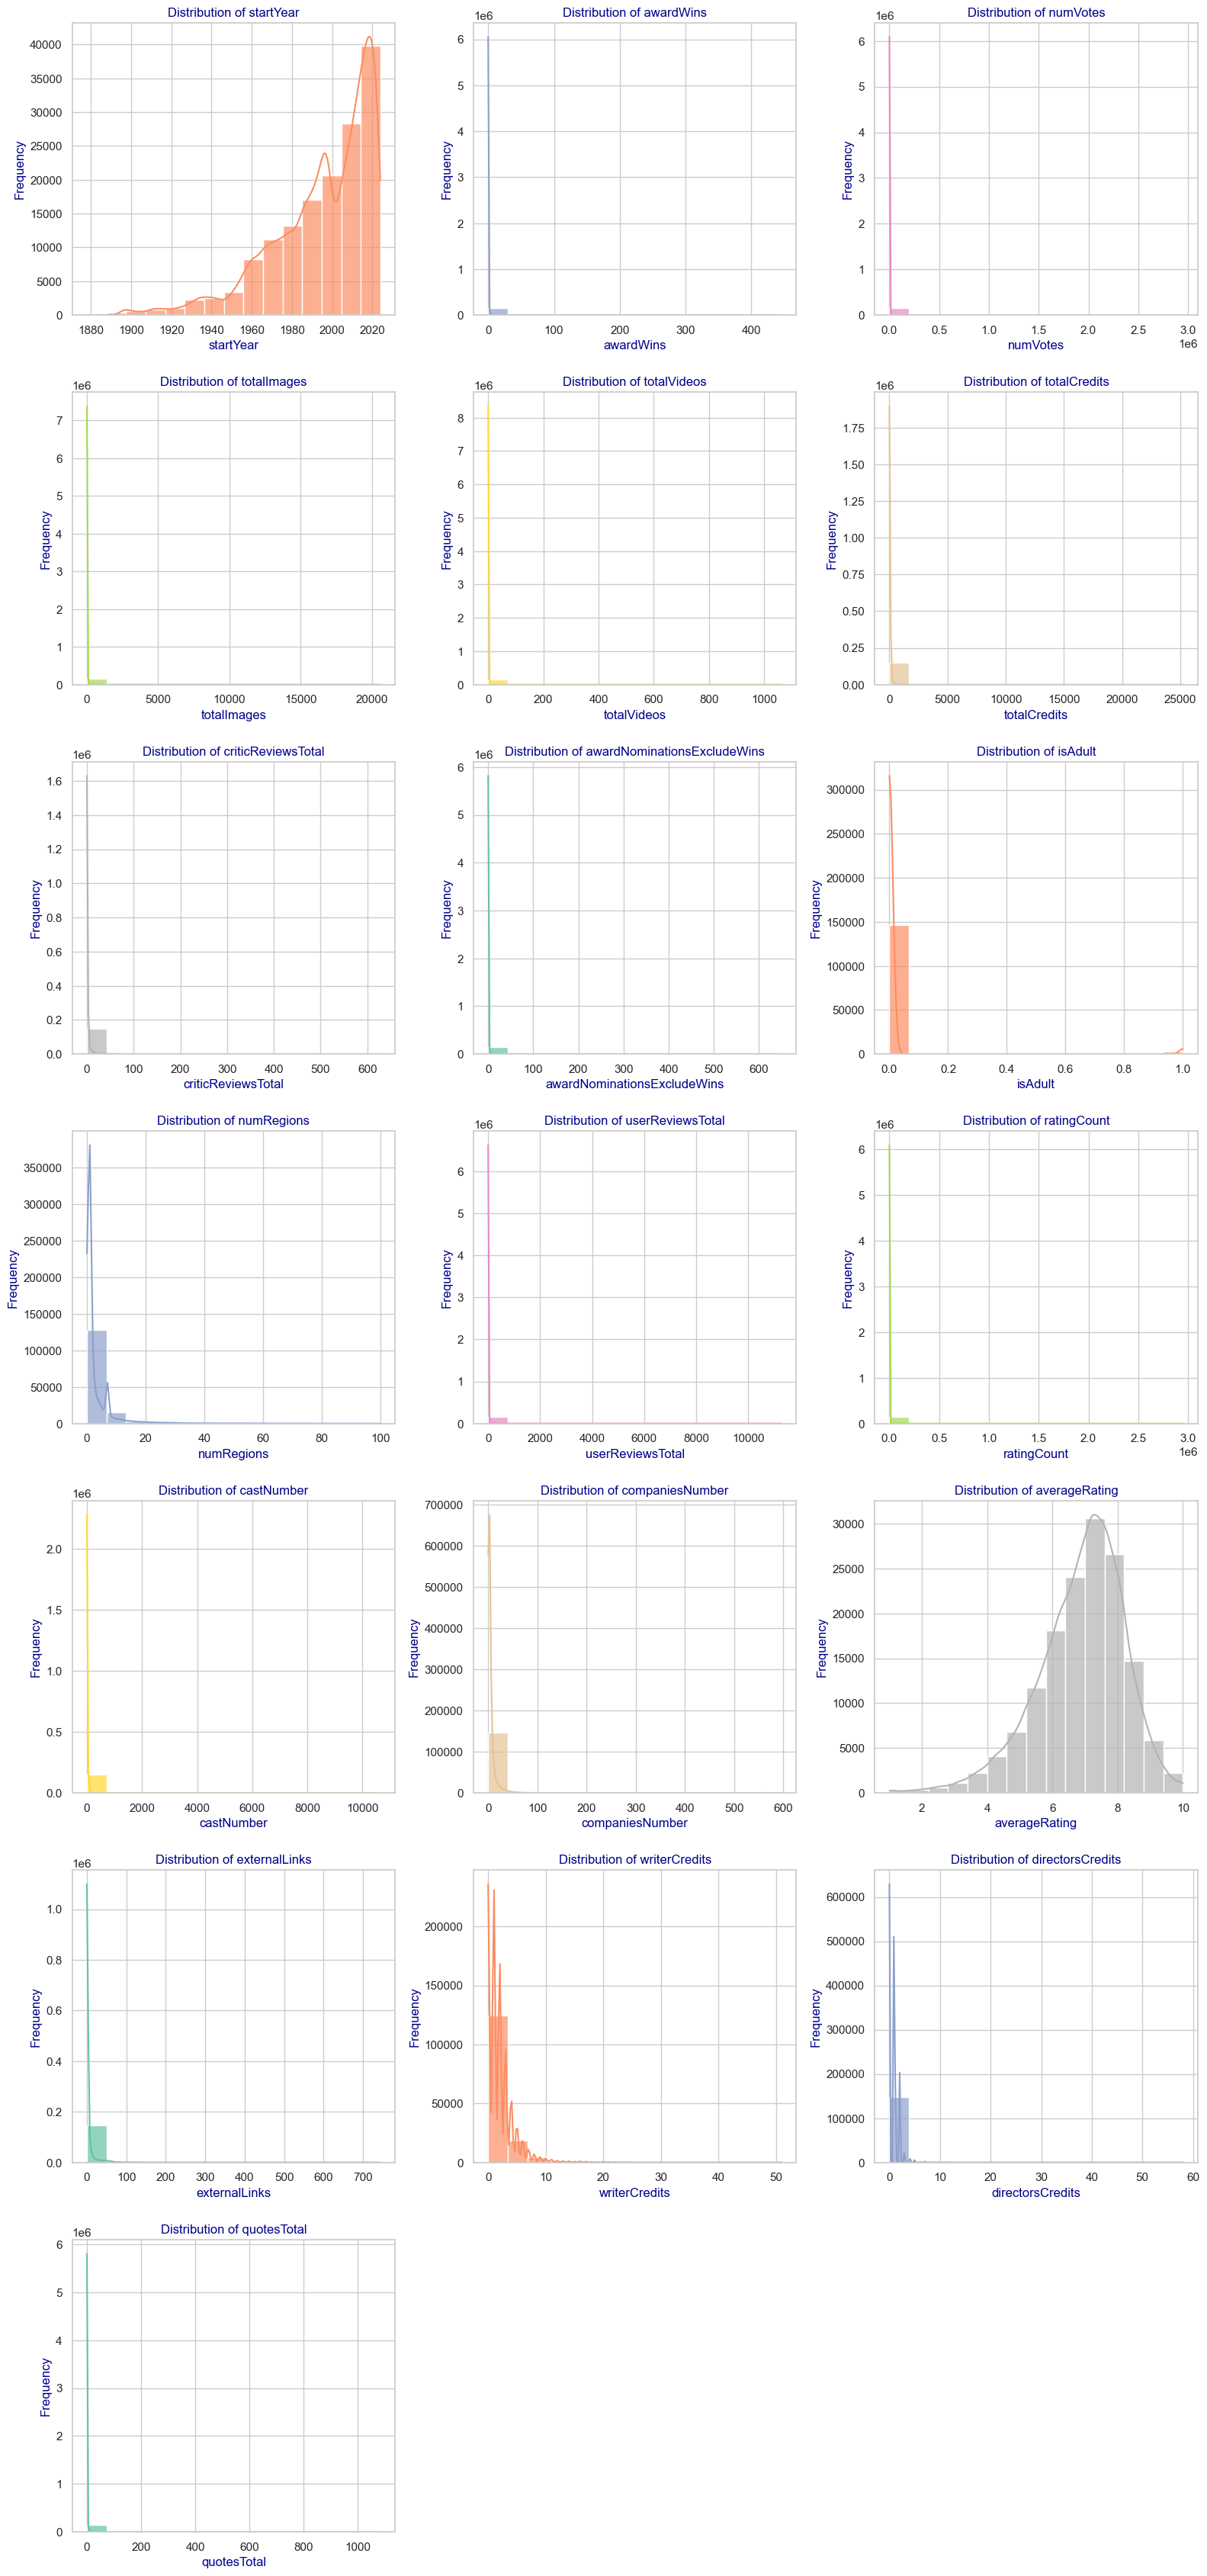

In [14]:
# Set a seaborn theme for styling
sns.set_theme(style="whitegrid")

# Adjust figure size
plt.figure(figsize=(16, 48))

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define a color palette
colors = sns.color_palette("Set2", len(numerical_columns))

# Loop through numerical columns to create subplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[col], kde=True, bins=15, color=colors[i % len(colors)], alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='normal', color='darkblue')
    plt.xlabel(col, fontsize=12, color='darkblue')
    plt.ylabel('Frequency', fontsize=12, color='darkblue')

# Adjust layout for readability
plt.tight_layout()
plt.show()


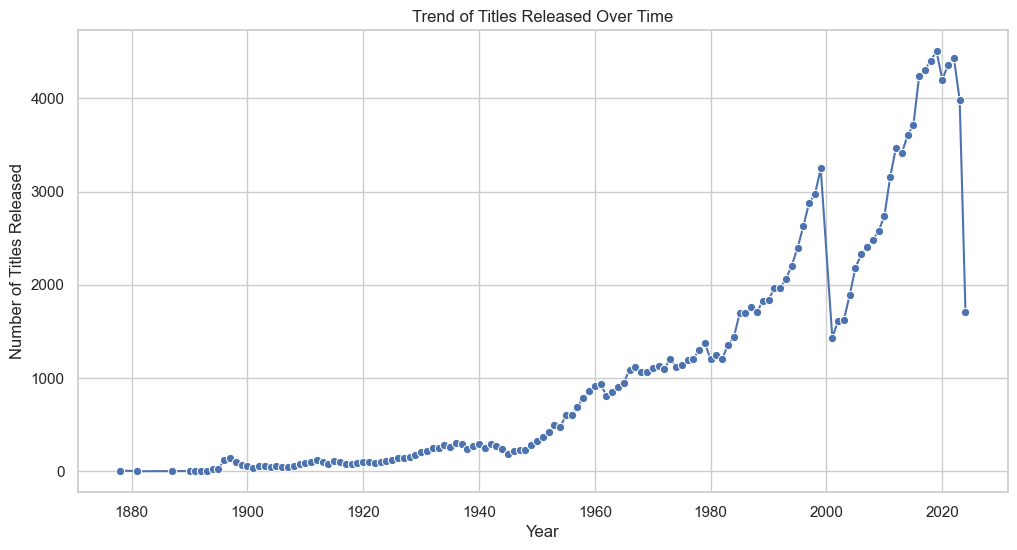

In [15]:
# Count the number of titles per start year
titles_per_year = df['startYear'].dropna().value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o', color='b')
plt.title('Trend of Titles Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')

plt.show()

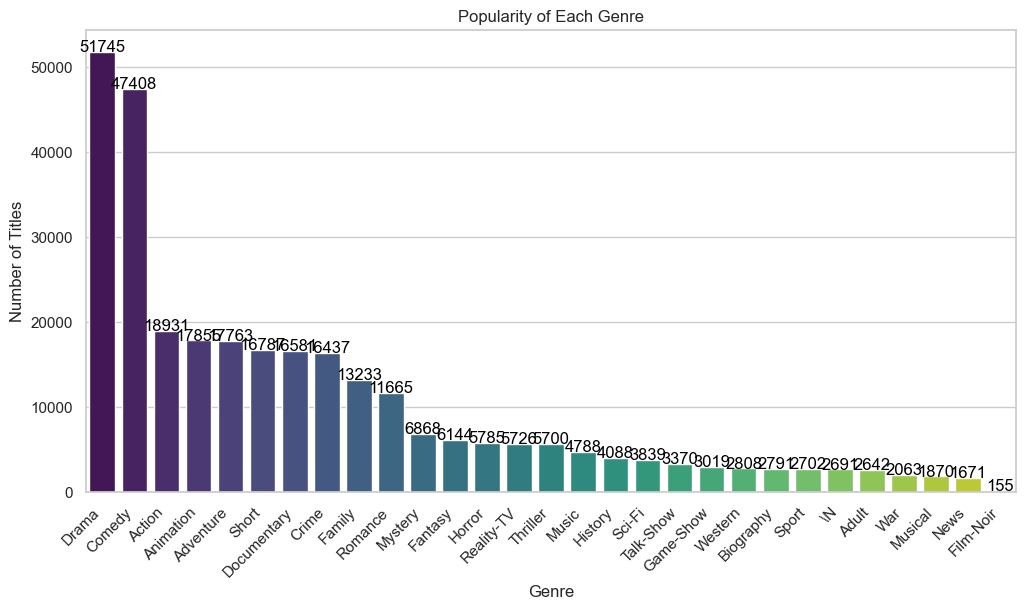

In [16]:
# Split and count genres
from collections import Counter

# Flatten the genre lists and count each genre
all_genres = df['genres'].dropna().str.split(',').sum()
genre_counts = Counter([genre.strip() for genre in all_genres])  # Remove whitespace

# Convert to DataFrame for easy plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_df, palette="viridis", hue = 'Genre',dodge = False, legend = False)
plt.xticks(rotation=45, ha='right')
plt.title('Popularity of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')

# Display values on top of bars
for index, value in enumerate(genre_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center', color='black', fontsize=8)

plt.show()

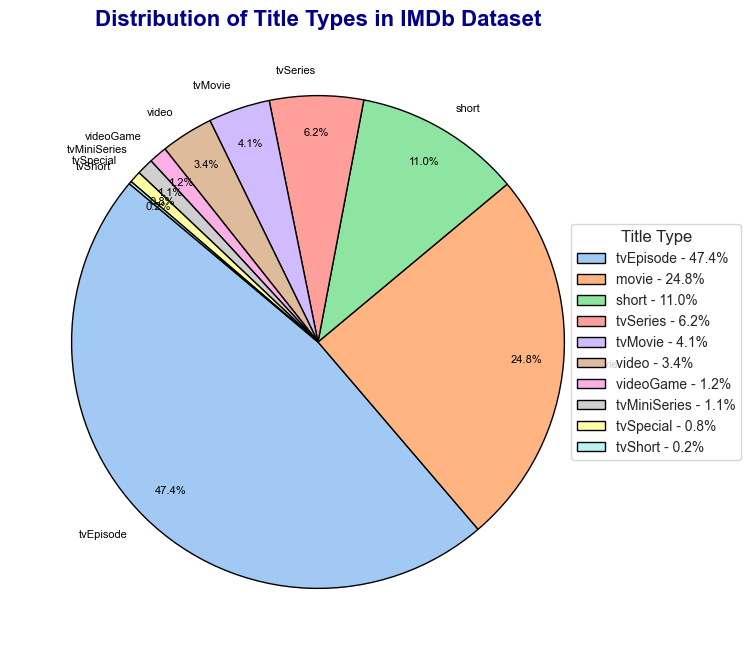

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for titleType (replace with your actual dataset column)
title_type_counts = df['titleType'].value_counts()

# Define colors using a color palette
colors = sns.color_palette("pastel", len(title_type_counts))

# Calculate percentages
percentages = (title_type_counts / title_type_counts.sum()) * 100

# Set figure size
plt.figure(figsize=(10, 8))

# Plot pie chart without labels but add legend instead
wedges, texts, autotexts = plt.pie(
    title_type_counts,
    labels=title_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85,
    labeldistance =1.1
)

# Set text properties for percentages on the pie chart
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(8)  # Reduced font size for percentage text
    autotext.set_fontweight('normal')

# Set text properties for percentages on the pie chart
for autotext in texts:
    autotext.set_color('black')
    autotext.set_fontsize(8)  # Reduced font size for percentage text
    autotext.set_fontweight('normal')

# Create legend labels with title types and percentages
legend_labels = [f"{label} - {percent:.1f}%" for label, percent in zip(title_type_counts.index, percentages)]

# Add legend with labels, percentages, and smaller font size
plt.legend(
    wedges,
    legend_labels,
    title="Title Type",
    loc="center left",
    bbox_to_anchor=(0.9, 0, 0.5, 1),
    fontsize=10  # Reduced font size for legend labels
)

# Add title
plt.title('Distribution of Title Types in IMDb Dataset', fontsize=16, fontweight='bold', color='darkblue')

# Show plot
plt.show()


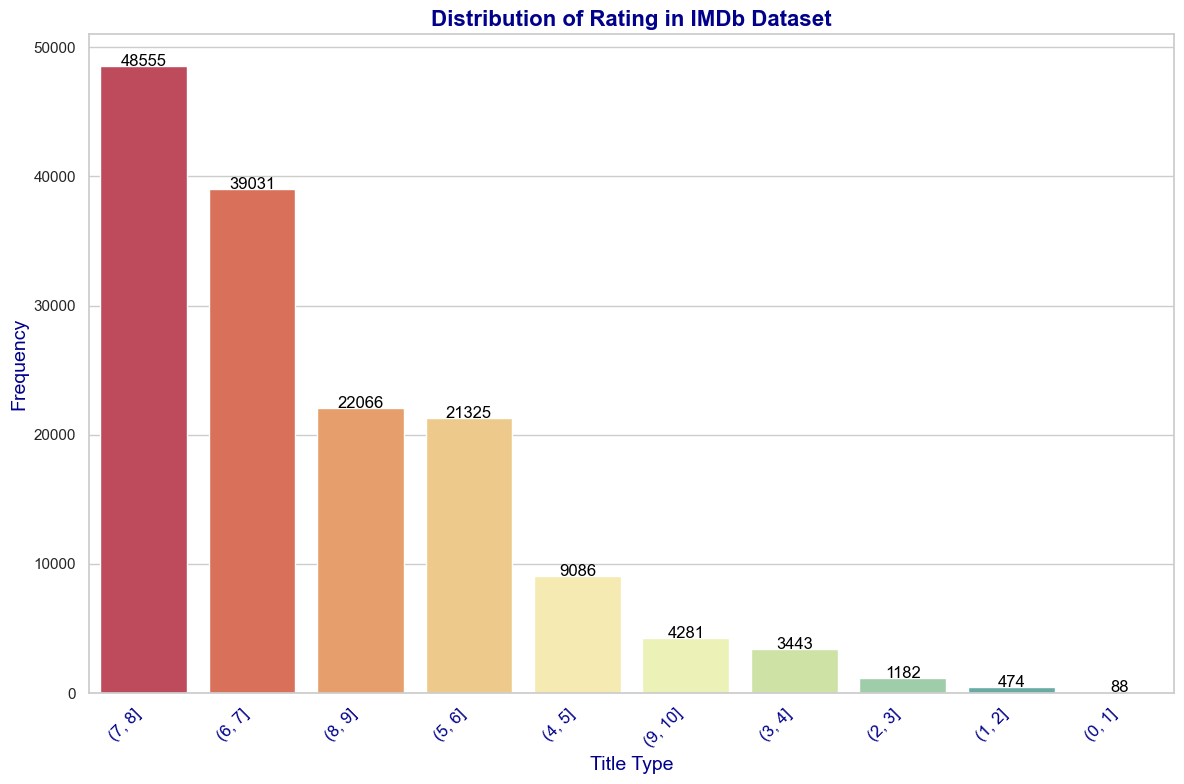

In [18]:
# Sample data for titleType (replace with your actual dataset column)
title_type_counts = df['rating'].value_counts().reset_index()
title_type_counts.columns = ['rating', 'count']

# Set a seaborn theme for styling
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(12, 8))

# Use a color palette
colors = sns.color_palette("Spectral", len(title_type_counts))

# Create bar plot with titleType as hue
sns.barplot(
    data=title_type_counts,
    x='rating',
    y='count',
    hue='rating',  # Assign titleType to hue to avoid warning
    dodge=False,      # Make sure bars don’t stack
    palette=colors,
    legend=False      # Disable legend as it's not needed
)

# Add labels and title
plt.title('Distribution of Rating in IMDb Dataset', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Title Type', fontsize=14, color='darkblue')
plt.ylabel('Frequency', fontsize=14, color='darkblue')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='darkblue')

# Display values on top of bars
for index, value in enumerate(title_type_counts['count']):
    plt.text(index, value + 0.5, str(value), ha='center', color='black', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [26]:
#checking the frequency of boolean features
print(df['canHaveEpisodes'].value_counts(),'\n')
print(df['isAdult'].value_counts())

canHaveEpisodes
False    138704
True      10827
Name: count, dtype: int64 

isAdult
0    146798
1      2733
Name: count, dtype: int64


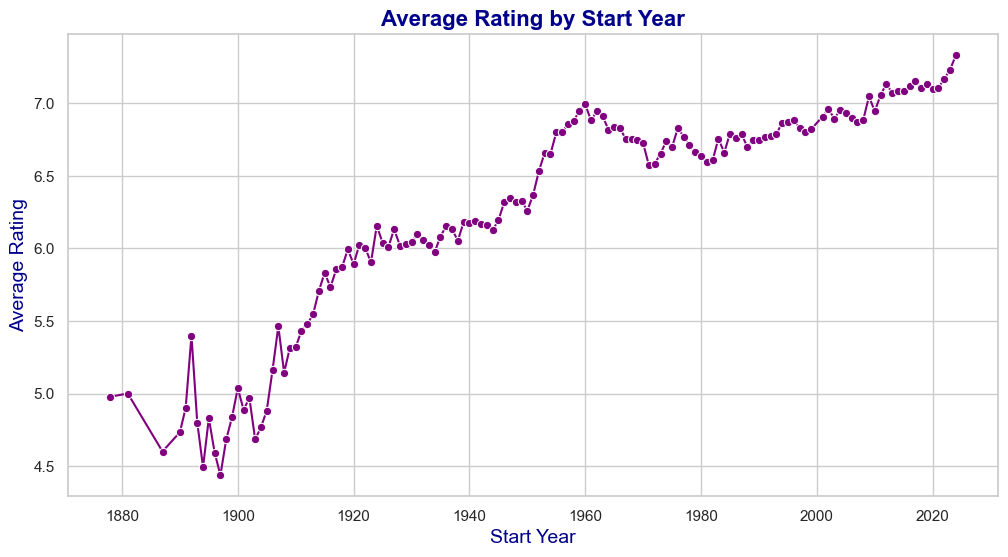

In [27]:
# 3. Line Plot: Average Rating by Start Year
# Group by startYear and calculate mean averageRating for each year
yearly_ratings = df.groupby('startYear')['averageRating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_ratings,
    x='startYear',
    y='averageRating',
    color='purple',
    marker='o'
)
plt.title('Average Rating by Start Year', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Start Year', fontsize=14, color='darkblue')
plt.ylabel('Average Rating', fontsize=14, color='darkblue')
plt.show()


In [4]:
a = []
for i in range(len(df)):
    if df['ratingCount'][i] != df['numVotes'][i]:
        a.append(i)
print(len(a))

15477


In [5]:

# Step 1: Find titles that occur more than once
duplicate_titles = df['originalTitle'].value_counts()
duplicate_titles = duplicate_titles[duplicate_titles > 1].index

# Step 2: Filter the DataFrame to keep only rows with those duplicate titles
df_duplicates = df[df['originalTitle'].isin(duplicate_titles)]


In [7]:
df_duplicates_sorted = df_duplicates.sort_values(by = 'originalTitle')
df_duplicates_sorted

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
77240,'Til Death Do Us Part,"(7, 8]",2008,\N,48,0,474,1,10,36,0,162,0,tvEpisode,0,False,True,0,1,6,475,['CA'],"Crime,Drama,Mystery",15,41,7.5,"['\\N', 'CA']",0,4,1,[],7
57548,'Til Death Do Us Part,"(7, 8]",1962,\N,60,0,133,1,10,2,0,31,3,tvEpisode,0,False,True,0,0,5,133,NaN,"Crime,Drama,Horror",13,4,7.2,['\\N'],4,2,1,['mono'],0
31482,'Tis Pity She's a Whore,"(6, 7]",1980,\N,135,0,33,1,10,2,0,24,0,tvMovie,0,False,True,0,1,0,33,['GB'],Drama,14,2,6.9,"['\\N', 'GB']",2,1,1,['mono'],0
45189,'Tis Pity She's a Whore,"(6, 7]",1997,\N,45,0,26,1,10,0,0,55,0,tvEpisode,0,False,True,0,1,0,26,['US'],"Crime,Drama,Mystery",21,1,6.8,"['\\N', 'US']",0,2,1,['stereo'],0
49321,'Twas the Night Before Christmas,"(8, 9]",1955,\N,30,0,450,1,10,5,0,24,2,tvEpisode,0,False,True,0,1,4,450,['US'],"Comedy,Family",7,2,9.0,"['\\N', 'US']",2,3,1,['mono'],7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112594,Épisode 6,"(6, 7]",2023,\N,48,0,17,1,10,0,0,53,0,tvEpisode,0,False,True,0,1,0,17,['FR'],Crime,16,12,6.7,"['\\N', 'FR']",11,7,1,['stereo'],0
135969,Épisode 6,"(6, 7]",2016,\N,47,0,16,1,10,0,0,50,0,tvEpisode,0,False,True,0,1,0,17,['FR'],"Crime,Drama,Mystery",15,16,6.6,"['\\N', 'FR']",0,8,1,[],0
102443,Épisode 6,"(6, 7]",2022,\N,52,0,9,1,10,1,0,90,0,tvEpisode,0,False,True,0,0,0,9,NaN,"Crime,Drama,Fantasy",24,3,6.7,['\\N'],4,4,1,['stereo'],0
96413,Épisode 6,"(6, 7]",2022,\N,\N,0,7,1,10,0,0,60,0,tvEpisode,0,False,True,0,0,0,7,NaN,Crime,15,1,6.7,['\\N'],0,0,0,[],0


In [8]:
df_duplicates_sorted.to_csv('df_duplicates_sorted.csv')

In [10]:
b = 0
for i in range(len(df)):
    if df['totalCredits'][i] < df['castNumber'][i]:
        b+=1
print(b)

0


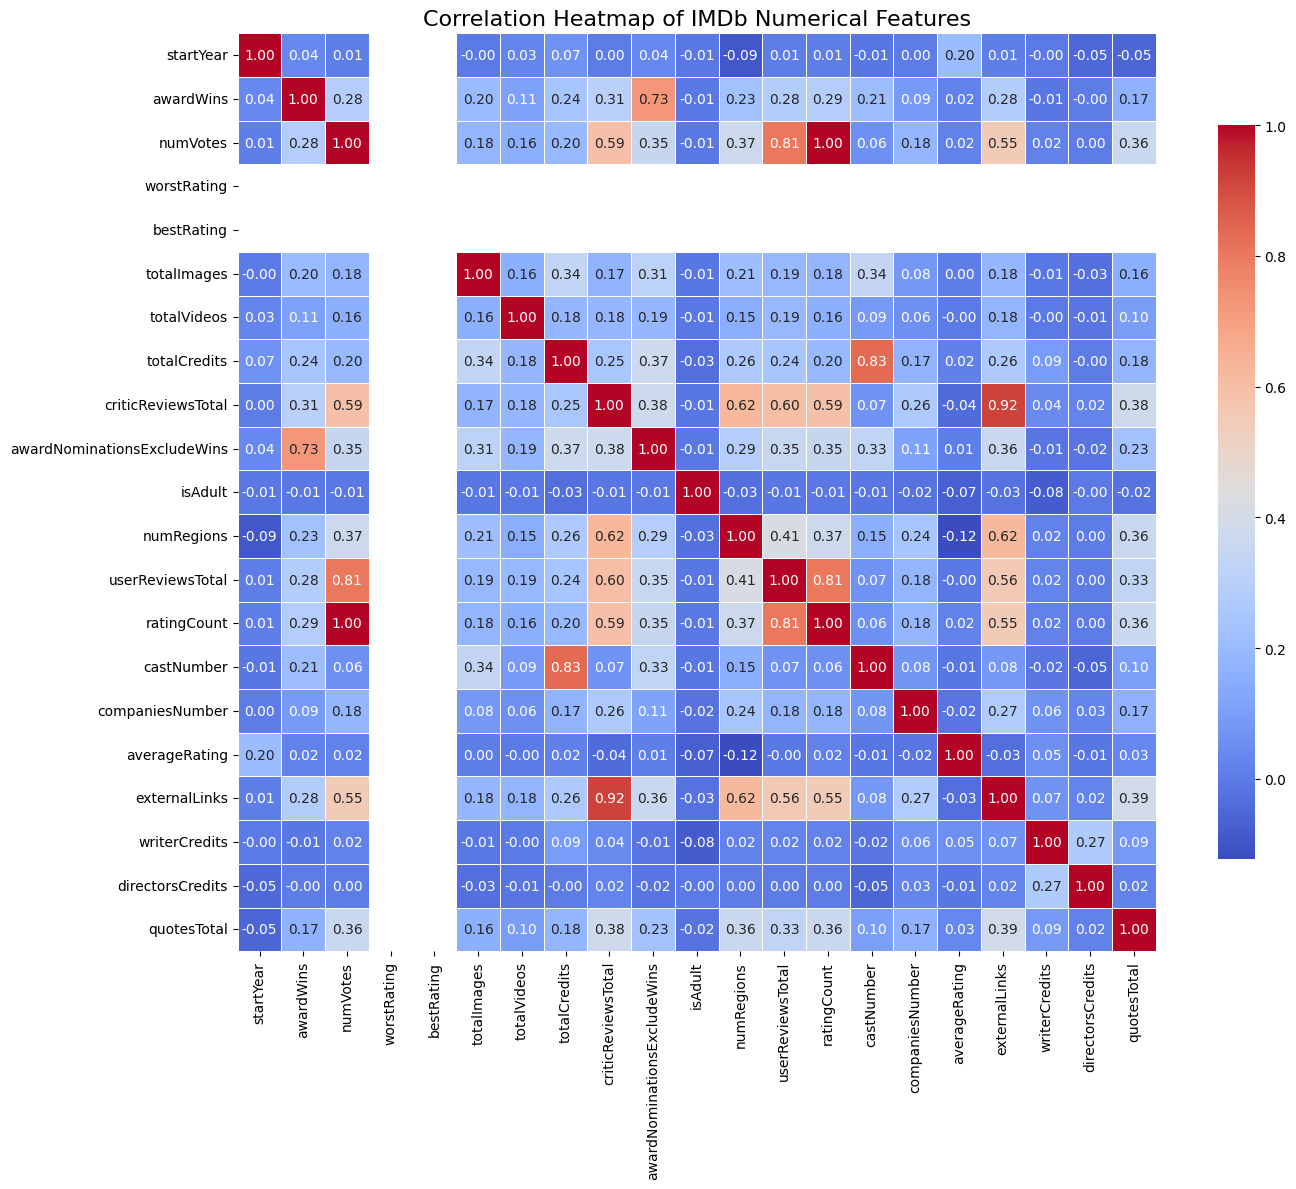

In [11]:
# Optional: Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))  # Adjust the figure size based on your data

# Generate a heatmap with annotations
sns.heatmap(corr_matrix, 
            annot=True,            # Show correlation coefficients
            fmt=".2f",             # Format decimal points
            cmap='coolwarm',       # Color scheme
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": 0.8})

# Title and show the plot
plt.title('Correlation Heatmap of IMDb Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
